# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

# Reading the data

In [2]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [5]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [6]:
cdf.isnull()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1062,False,False,False,False
1063,False,False,False,False
1064,False,False,False,False
1065,False,False,False,False


# Data Visualise

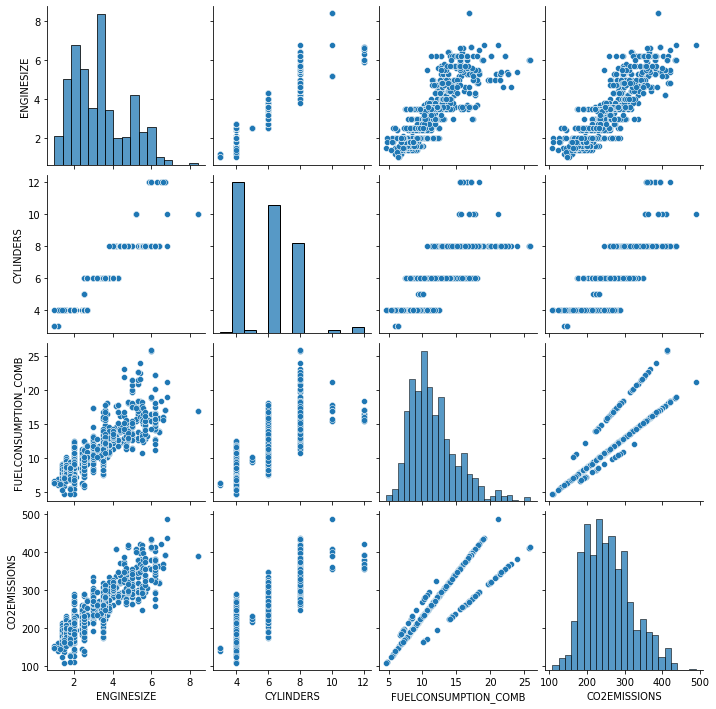

In [7]:
sns.pairplot(cdf)

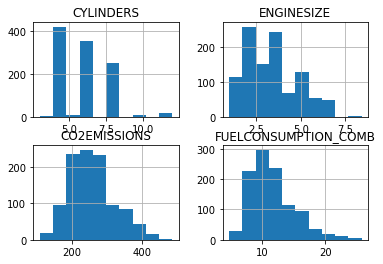

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

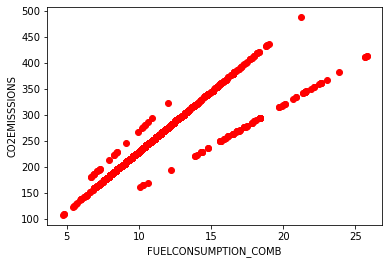

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSSIONS")
plt.show()

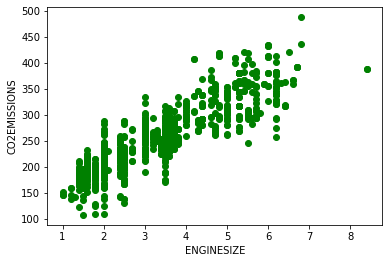

In [10]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='green')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

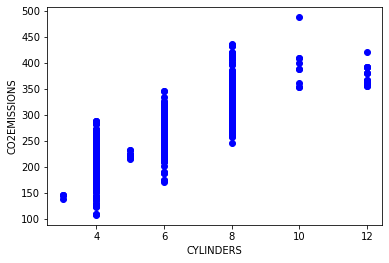

In [11]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

<AxesSubplot:>

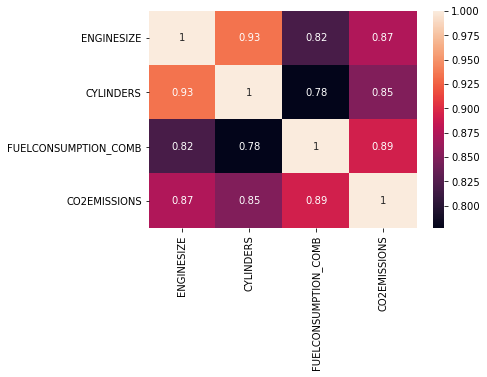

In [12]:
sns.heatmap(cdf.corr(),annot=True)

# Train and Testing the model

In [14]:
X=cdf[['ENGINESIZE']]
y=cdf[['CO2EMISSIONS']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

# Train the data

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm=LinearRegression()

In [38]:
model=lm.fit(X_train,y_train)
model

LinearRegression()

In [39]:
print("coefficent is:\n",lm.coef_,"\nintercept is:\n",lm.intercept_)

coefficent is:
 [[39.43709479]] 
intercept is:
 [124.50629876]


In [40]:
df=lm.predict(X_test)

Text(0, 0.5, 'Emission')

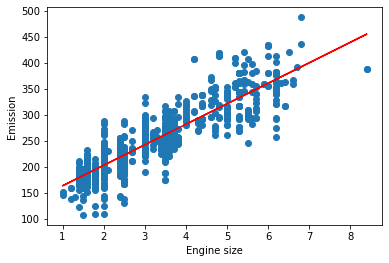

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lm.coef_*X_train+lm.intercept_,'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [44]:
X=[[2.0]]
pred=model.predict(X)
print(pred)

[[203.38048834]]


In [47]:
from sklearn import metrics

print('MAE: ',metrics.mean_absolute_error(y_test,df))
print('MSE: ',metrics.mean_squared_error(y_test,df))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,df)))

MAE:  23.458664593920695
MSE:  907.3783698734919
RMSE:  30.122721820471202
